# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff": "crew"
})

df_titanic_passenger = df_titanic[df_titanic["type"] == "passenger"]
df_titanic_passenger

cross_tab = pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize = True, margins = True)
cross_tab

embarked,B,C,Q,S,All
class,,,,,
1st,0.002278,0.108580,0.002278,0.132878,0.246014
2nd,0.004556,0.019742,0.005315,0.186029,0.215642
3rd,0.000000,0.077449,0.085801,0.375095,0.538345
All,0.006834,0.205771,0.093394,0.694002,1.000000


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [4]:
# conditional distribution of their class given where they embarked

class_given_b = cross_tab.iloc[0:3, 0] / cross_tab.iloc[3, 0]
print(f"Class Distribution Given Embarked = B")
print(class_given_b)
print()

class_given_c = cross_tab.iloc[0:3, 1] / cross_tab.iloc[3, 1]
print(f"Class Distribution Given Embarked = C")
print(class_given_c)
print()

class_given_q = cross_tab.iloc[0:3, 2] / cross_tab.iloc[3, 2]
print(f"Class Distribution Given Embarked = Q")
print(class_given_q)
print()

class_given_s = cross_tab.iloc[0:3, 3] / cross_tab.iloc[3, 3]
print(f"Class Distribution Given Embarked = S")
print(class_given_s)

Class Distribution Given Embarked = B
class
1st    0.333333
2nd    0.666667
3rd    0.000000
Name: B, dtype: float64

Class Distribution Given Embarked = C
class
1st    0.527675
2nd    0.095941
3rd    0.376384
Name: C, dtype: float64

Class Distribution Given Embarked = Q
class
1st    0.024390
2nd    0.056911
3rd    0.918699
Name: Q, dtype: float64

Class Distribution Given Embarked = S
class
1st    0.191466
2nd    0.268053
3rd    0.540481
Name: S, dtype: float64


In [5]:
# conditional distribution of where they embarked given their class

embarked_given_1st = cross_tab.iloc[0, 0:4] / cross_tab.iloc[0, 4]
print(f"Embarked Distribution Given Class = 1st")
print(embarked_given_1st)
print()

embarked_given_2nd = cross_tab.iloc[1, 0:4] / cross_tab.iloc[1, 4]
print(f"Embarked Distribution Given Class = 2nd")
print(embarked_given_2nd)
print()

embarked_given_3rd = cross_tab.iloc[2, 0:4] / cross_tab.iloc[2, 4]
print(f"Embarked Distribution Given Class = 3rd")
print(embarked_given_3rd)

Embarked Distribution Given Class = 1st
embarked
B    0.009259
C    0.441358
Q    0.009259
S    0.540123
Name: 1st, dtype: float64

Embarked Distribution Given Class = 2nd
embarked
B    0.021127
C    0.091549
Q    0.024648
S    0.862676
Name: 2nd, dtype: float64

Embarked Distribution Given Class = 3rd
embarked
B    0.000000
C    0.143865
Q    0.159379
S    0.696756
Name: 3rd, dtype: float64


In [6]:
# What proportion of 3rd class passengers embarked at Southampton?
class_3 = cross_tab.iloc[2, 4]
class_3_embarked_s = cross_tab.iloc[2, 3]
class_3_embarked_s / class_3

np.float64(0.696755994358251)

In [7]:
# What proportion of Southampton passengers were in 3rd class?
embarked_s = cross_tab.iloc[3, 3]
class_3_embarked_s = cross_tab.iloc[2, 3]
class_3_embarked_s / embarked_s

np.float64(0.5404814004376367)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

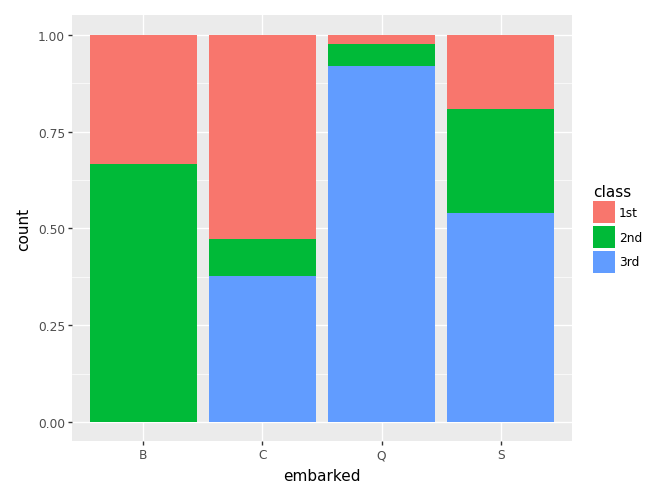

In [8]:
# Code here
(ggplot(df_titanic_passenger,
aes(
  x = "embarked",
  fill = "class"
))
+ geom_bar(position = "fill")
)

The pro is the visualization and visualization helps us see the distribution better. However, the con is that you can't see the detailed exact numbers. You also need two bar plots for when the distribution is class given embarked or embarked given class. Only one crosstab is required, however.